# 8

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [3]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [4]:
X=MS(['horsepower']).fit_transform(Auto)
y=Auto['mpg']
model=sm.OLS(y,X)


summarize(model.fit())

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


# (a)(1):TODO Is there a relationship between the predictor and the response?

## Yes

# (a)(2):TODO How strong is the relationship between the predictor and the response?

## The relationship is strong, as the p-value is less than 0.05.
# (a)(3):TODO Is the relationship positive or negative?

## The relationship is negative, as the coefficient is negative.


# (a)(4):TODO What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

## Predicted Value: 25.2

In [5]:
new_X=MS(['horsepower']).fit_transform(pd.DataFrame({'horsepower':[98]}))

model=model.fit()
prediction=model.get_prediction(new_X)

conf_int=prediction.conf_int(alpha=0.05)
pred_int=prediction.conf_int(obs=True,alpha=0.05)

In [6]:
conf_int

array([[23.97307896, 24.96107534]])

In [7]:
pred_int

array([[14.80939607, 34.12475823]])

## confidence interval: array([[23.97307896, 24.96107534]])
## prediction interval: array([[14.80939607, 34.12475823]])


Text(0.5, 1.0, 'MPG vs Horsepower with Regression Line')

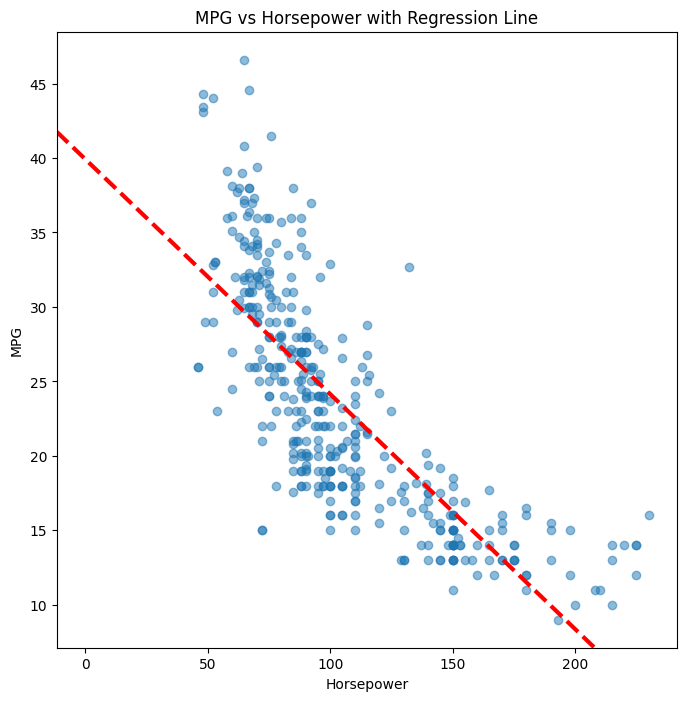

In [8]:
# 创建新的坐标轴并绘制散点图
fig, ax = subplots(figsize=(8, 8))
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.5)

# 获取回归系数
results=model
intercept = results.params.iloc[0]  # 截距
slope = results.params.iloc[1]      # 斜率

# 使用 axline 绘制回归线
# axline 需要 (x, y) 点和斜率，或者两个点
# 方法 2a: 使用点和斜率
ax.axline((0, intercept), slope=slope, color='r', linestyle='--', linewidth=3)

# 或者方法 2b: 使用两个点
# x_min, x_max = Auto['horsepower'].min(), Auto['horsepower'].max()
# y_min = intercept + slope * x_min
# y_max = intercept + slope * x_max
# ax.axline((x_min, y_min), (x_max, y_max), color='r', linestyle='--', linewidth=3)

# 设置标签
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs Horsepower with Regression Line')

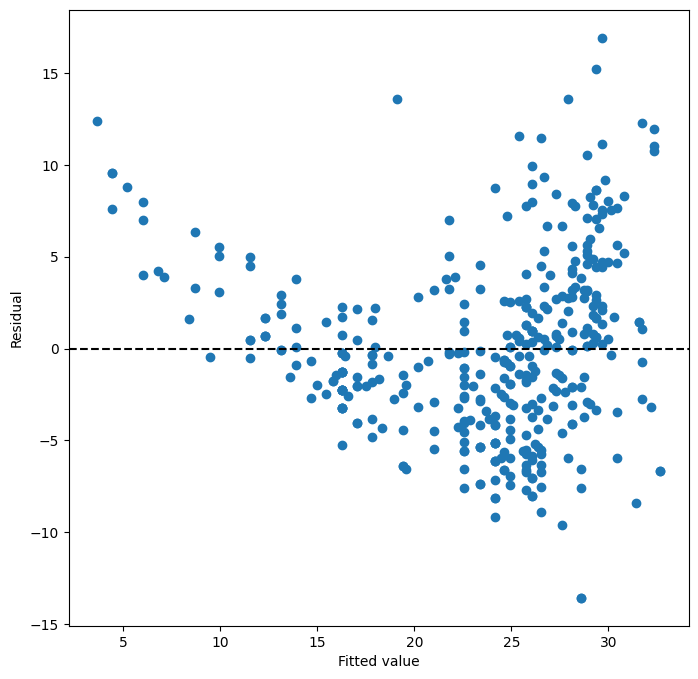

In [9]:
# 首先确保模型已拟合
results = model

# 诊断图 1: 残差图（Residuals vs Fitted Values）
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  # 添加 y=0 的参考线

np.int64(115)

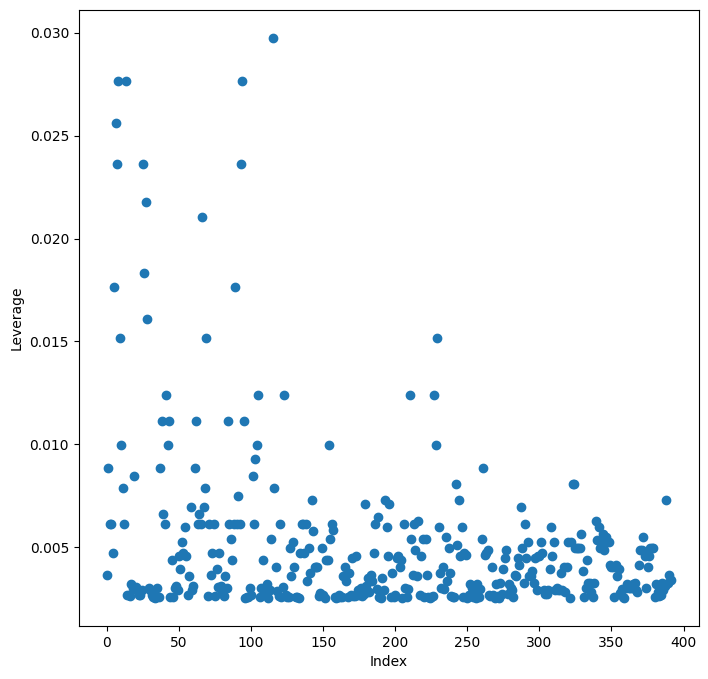

In [10]:
# 诊断图 2: 杠杆图（Leverage Plot）
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)  # 找出杠杆值最大的观测点

# 9

In [11]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


# (a) TODO Produce a scatterplot matrix which includes all of the variables in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

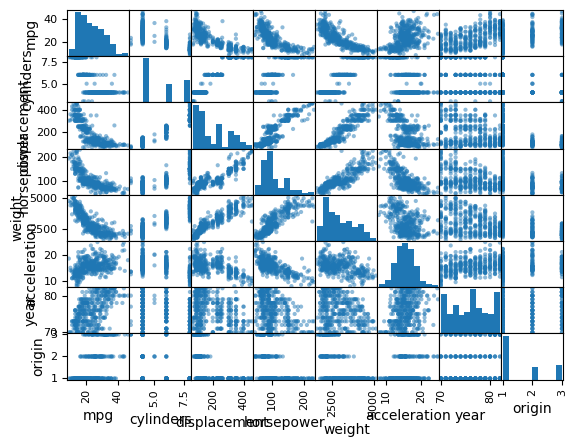

In [12]:
pd.plotting.scatter_matrix(Auto)

# (b) TODO Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [13]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# (c) TODO Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.Comment on the output.

In [14]:
y=Auto['mpg']
X=Auto.drop(columns=['mpg'])
X=MS(list(X.columns)).fit_transform(X)

model=sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


# i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

yes

## ii. Which predictors appear to have a statistically significant relationship to the response?

## weight,year,origin

# iii. What does the coefficient for the year variable suggest?

# It has positive effect on mpgs.

# (d) TODO Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

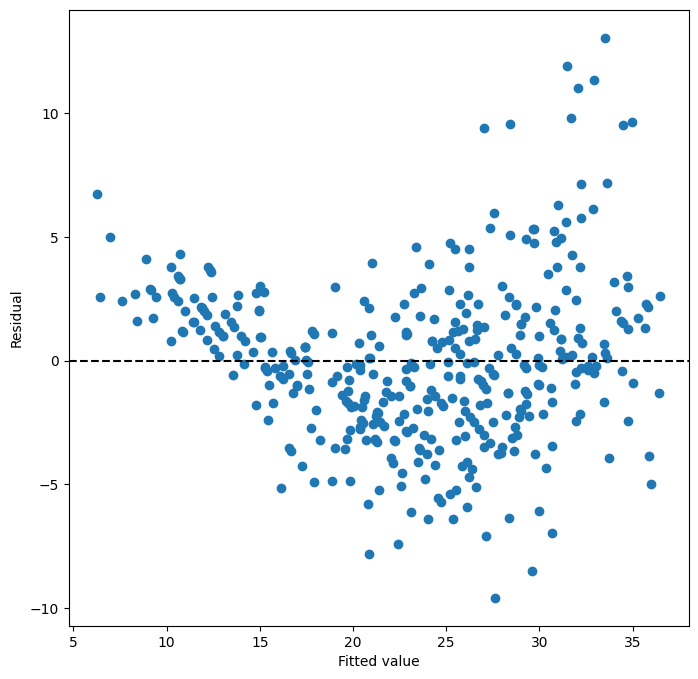

In [15]:
# 首先确保模型已拟合
results = model.fit()

# 诊断图 1: 残差图（Residuals vs Fitted Values）
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  # 添加 y=0 的参考线

np.int64(13)

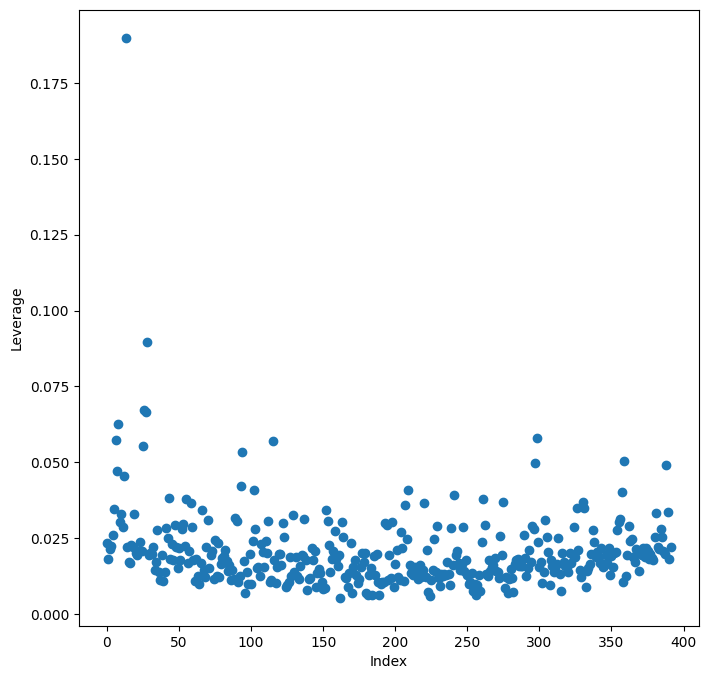

In [16]:
# 诊断图 2: 杠杆图（Leverage Plot）
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)  # 找出杠杆值最大的观测点

# (e) TODO Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [17]:
X=Auto.drop(columns=['mpg'])
X_interaction = MS(list(X.columns) + [('weight','year')]).fit_transform(X)

model1=sm.OLS(y,X_interaction)
summarize(model1.fit())


,coef,std err,t,P>|t|
intercept,-118.5635,13.376000,-8.864,0.000
cylinders,-0.1218,0.303000,-0.402,0.688
displacement,0.0129,0.007000,1.842,0.066
horsepower,-0.0288,0.013000,-2.236,0.026
weight,0.0304,0.005000,6.543,0.000
acceleration,0.1447,0.092000,1.574,0.116
year,2.0841,0.173000,12.033,0.000
origin,1.1736,0.260000,4.519,0.000
weight:year,-0.0005,0.000061,-8.002,0.000


## weight*year is statistically significant.

In [18]:
X=Auto.drop(columns=['mpg'])
X=MS([poly('weight',degree=2),poly('year',degree=2)]).fit_transform(X)

model2=sm.OLS(y,X)
summarize(model2.fit())



,coef,std err,t,P>|t|
intercept,23.4459,0.148,157.922,0.0
"poly(weight, degree=2)[0]",-108.2100,3.110,-34.796,0.0
"poly(weight, degree=2)[1]",31.3893,2.978,10.540,0.0
"poly(year, degree=2)[0]",60.7682,3.129,19.418,0.0
"poly(year, degree=2)[1]",15.0146,2.958,5.077,0.0


# The feature weight^2+weight, year^2+year are statistically significant.

# 10

# (a) TODO Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [19]:
Carseats=load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
y=Carseats['Sales']
X=MS(['Price','Urban','US']).fit_transform(Carseats)


In [21]:
model=sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


# (b) TODO Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

# <small>Sales decreases 0.0545 when Price increases 1 unit.</small>
# <small>Sales is smaller than non-urban area by 0.0219 unit.</small>
# <small>Sales is larger than non-US area by 1.2006 unit</small>

# (c) TODO Write out the model in equation form, being careful to handle the qualitative variables properly

# <small> Sales = 13.0435 - 0.0545*Price + 0.0219*(Urban==Yes) + 1.2006*(US==Yes)</small>

# (d) TODO For which of the predictors can you reject the null hypothesis H0 : βj = 0?

# <small> Price and US </small>

# (e) TODO On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [22]:
X=MS(['Price','US']).fit_transform(Carseats)

small_model=sm.OLS(y,X)
summarize(small_model.fit())

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


# (f) TODO How well do the models in (a) and (e) fit the data?

In [23]:
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.39e-23
Time:                        20:28:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
small_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           2.66e-24
Time:                        20:28:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# <small> Nearyly the same results. </small>

# TODO (g)  Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [25]:
small_model_fit=small_model.fit()

conf_int_coef=small_model_fit.conf_int(alpha=0.05)

conf_int_coef

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


# (h) TODO Is there evidence of outliers or high leverage observations in the model from (e)?

In [26]:
infl=small_model_fit.get_influence()

studentized_residuals=infl.resid_studentized_external

outliers = np.abs(studentized_residuals) > 3

print("Strange Values Count:", outliers.sum())


Strange Values Count: 0


In [27]:
leverage = infl.hat_matrix_diag
n = len(leverage)  # 样本数
p = small_model_fit.df_model  # 预测变量数（不包括截距）
threshold = 2 * (p + 1) / n  # 阈值
high_leverage = leverage > threshold

print("High Leverage Count:", high_leverage.sum())







High Leverage Count: 20


/tmp/ipykernel_29007/326585494.py:23: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_29007/326585494.py:23: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/root/UCB_CS189/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38408 (\N{CJK UNIFIED IDEOGRAPH-9608}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/UCB_CS189/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


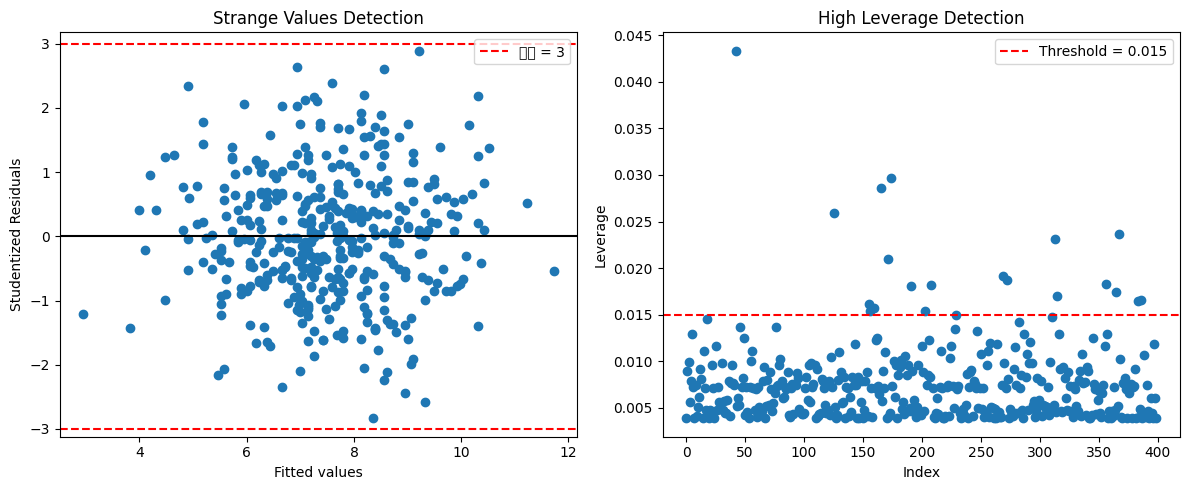

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 学生化残差图
axes[0].scatter(small_model_fit.fittedvalues, studentized_residuals)
axes[0].axhline(y=3, color='r', linestyle='--', label='阈值 = 3')
axes[0].axhline(y=-3, color='r', linestyle='--')
axes[0].axhline(y=0, color='k', linestyle='-')
axes[0].set_xlabel('Fitted values')
axes[0].set_ylabel('Studentized Residuals')
axes[0].set_title('Strange Values Detection')
axes[0].legend()

# 杠杆值图
axes[1].scatter(np.arange(n), leverage)
axes[1].axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold:.3f}')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('High Leverage Detection')
axes[1].legend()

plt.tight_layout()
plt.show()

# <small> 0 Strange Value and 20 High Leverage Values</small>

# 11

In [29]:
rng=np.random.default_rng(1)
x=rng.normal(size=100)

y=2*x+rng.normal(size=100)


In [30]:
x

array([ 3.45584192e-01,  8.21618144e-01,  3.30437076e-01, -1.30315723e+00,
        9.05355867e-01,  4.46374572e-01, -5.36953235e-01,  5.81118104e-01,
        3.64572396e-01,  2.94132497e-01,  2.84222413e-02,  5.46712987e-01,
       -7.36454087e-01, -1.62909948e-01, -4.82119313e-01,  5.98846213e-01,
        3.97221075e-02, -2.92456751e-01, -7.81908462e-01, -2.57192241e-01,
        8.14218052e-03, -2.75602905e-01,  1.29406381e+00,  1.00672432e+00,
       -2.71116248e+00, -1.88901325e+00, -1.74772092e-01, -4.22190412e-01,
        2.13642997e-01,  2.17321931e-01,  2.11783876e+00, -1.11202076e+00,
       -3.77605007e-01,  2.04277161e+00,  6.46702996e-01,  6.63063372e-01,
       -5.14006372e-01, -1.64807517e+00,  1.67464744e-01,  1.09014088e-01,
       -1.22735205e+00, -6.83226662e-01, -7.20436797e-02, -9.44751623e-01,
       -9.82699679e-02,  9.54830275e-02,  3.55862371e-02, -5.06291658e-01,
        5.93748072e-01,  8.91166954e-01,  3.20848305e-01, -8.18230227e-01,
        7.31652284e-01, -

In [31]:
X=MS('x',intercept=False).fit_transform(pd.DataFrame({'x':x}))

# (a): TODO Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0.

In [32]:
model=sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


# <small> Reject the null hypothesis. </small>

# (b) TODO Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [33]:
X=MS('y',intercept=False).fit_transform(pd.DataFrame({'y':y}))
model=sm.OLS(x,X)
summarize(model.fit())



,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


# (c) TODO What is the relationship between the results obtained in (a) and (b)?

# <small> coefficient1*coefficient2 is nearly 1. </small>

# (d)(e)(f) written proof part

# 12

# (a) written proof

# (b) TODO  Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [34]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize

# 设置随机种子以便复现
rng = np.random.default_rng(1)

# 生成 n=100 个观测值
n = 100

# 方法1: 让 X 和 Y 有不同的方差
# 生成 X（方差较大）
x = rng.normal(0, 3, size=n)  # 标准差为3

# 生成 Y，使其与 X 相关但方差较小
y = 2 * x + rng.normal(0, 1, size=n)  # 标准差为1的噪声

# 回归 Y ~ X（无截距）
X_model = MS('x', intercept=False).fit_transform(pd.DataFrame({'x': x}))
model_yx = sm.OLS(y, X_model)
results_yx = model_yx.fit()
coef_yx = results_yx.params[0]

# 回归 X ~ Y（无截距）
Y_model = MS('y', intercept=False).fit_transform(pd.DataFrame({'y': y}))
model_xy = sm.OLS(x, Y_model)
results_xy = model_xy.fit()
coef_xy = results_xy.params[0]

# 打印结果
print("回归 Y ~ X 的系数:", coef_yx)
print("回归 X ~ Y 的系数:", coef_xy)
print("\n系数是否不同?", not np.isclose(coef_yx, coef_xy))
print("\nY ~ X 的回归结果:")
summarize(results_yx)
print("\nX ~ Y 的回归结果:")
summarize(results_xy)

回归 Y ~ X 的系数: 1.992080792480683
回归 X ~ Y 的系数: 0.48365186553313927

系数是否不同? True

Y ~ X 的回归结果:

X ~ Y 的回归结果:


/tmp/ipykernel_29007/3190228580.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_yx = results_yx.params[0]
/tmp/ipykernel_29007/3190228580.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_xy = results_xy.params[0]


,coef,std err,t,P>|t|
y,0.4837,0.009,51.102,0.0


# (c) TODO Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize

# 设置随机种子以便复现
rng = np.random.default_rng(1)

# 生成 n=100 个观测值
n = 100

# 方法1: 让 Y = X（最简单的情况）
x = rng.normal(0, 1, size=n)
y = x.copy()  # Y = X

# 回归 Y ~ X（无截距）
X_model = MS('x', intercept=False).fit_transform(pd.DataFrame({'x': x}))
model_yx = sm.OLS(y, X_model)
results_yx = model_yx.fit()
coef_yx = results_yx.params[0]

# 回归 X ~ Y（无截距）
Y_model = MS('y', intercept=False).fit_transform(pd.DataFrame({'y': y}))
model_xy = sm.OLS(x, Y_model)
results_xy = model_xy.fit()
coef_xy = results_xy.params[0]

# 打印结果
print("回归 Y ~ X 的系数:", coef_yx)
print("回归 X ~ Y 的系数:", coef_xy)
print("\n系数是否相同?", np.isclose(coef_yx, coef_xy))
print("\nY ~ X 的回归结果:")
summarize(results_yx)
print("\nX ~ Y 的回归结果:")
summarize(results_xy)

回归 Y ~ X 的系数: 1.0
回归 X ~ Y 的系数: 1.0

系数是否相同? True

Y ~ X 的回归结果:

X ~ Y 的回归结果:


/tmp/ipykernel_29007/4274886215.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_yx = results_yx.params[0]
/tmp/ipykernel_29007/4274886215.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef_xy = results_xy.params[0]
/root/UCB_CS189/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1871: RuntimeWarning: divide by zero encountered in scalar divide
  return self.mse_model/self.mse_resid
/root/UCB_CS189/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:955: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / 

,coef,std err,t,P>|t|
y,1.0,0,inf,0.0


# 13

# (a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

In [36]:
rng=np.random.default_rng(1)
n=100
x=rng.random(size=n)

x

array([0.51182162, 0.9504637 , 0.14415961, 0.94864945, 0.31183145,
       0.42332645, 0.82770259, 0.40919914, 0.54959369, 0.02755911,
       0.75351311, 0.53814331, 0.32973172, 0.7884287 , 0.30319483,
       0.45349789, 0.1340417 , 0.40311299, 0.20345524, 0.26231334,
       0.75036467, 0.28040876, 0.48519097, 0.9807372 , 0.96165719,
       0.72478994, 0.54122686, 0.2768912 , 0.16065201, 0.96992541,
       0.51606859, 0.11586561, 0.62348976, 0.77668311, 0.6130033 ,
       0.9172977 , 0.03959288, 0.52858926, 0.45933588, 0.06234958,
       0.64132817, 0.85263284, 0.59294102, 0.26009745, 0.83988152,
       0.50949588, 0.51088888, 0.75303021, 0.14792204, 0.81962672,
       0.68328691, 0.78709694, 0.19161626, 0.80236416, 0.19132393,
       0.08155262, 0.85522697, 0.8612835 , 0.8765371 , 0.47190972,
       0.27404839, 0.00709183, 0.6457209 , 0.71990938, 0.83556922,
       0.28187783, 0.21521817, 0.63933138, 0.80505483, 0.96367087,
       0.15052483, 0.48221239, 0.89471586, 0.42271691, 0.58950

# (b) TODO Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [37]:
eps=rng.normal(size=n,loc=0,scale=0.25)
eps

array([ 8.32034033e-02, -1.62820253e-01,  2.15611199e-01, -3.13980210e-02,
        1.67288310e-01,  3.04710901e-01,  9.57323957e-02, -2.18930286e-01,
       -3.78579658e-01,  4.38346029e-01, -2.78230483e-02, -1.72141237e-01,
        3.60642720e-02, -4.78528326e-02,  2.13035566e-01,  8.48204561e-03,
        3.43739590e-03, -1.78644930e-01,  1.17392025e-01, -2.58466681e-01,
        1.66472360e-01,  3.80984378e-01, -3.81171510e-01, -6.16557308e-01,
        1.54219689e-01,  6.36974454e-01, -2.50231212e-01, -3.12673940e-01,
        1.47242233e-01, -2.10180398e-01, -1.26506371e-01, -8.70293667e-02,
        1.33000522e-01, -1.01325590e-01,  6.94707100e-02, -4.41333147e-02,
       -2.11167776e-01, -7.99565644e-02, -2.37599916e-01,  1.62874647e-03,
       -2.80966557e-01, -2.73223592e-01,  3.64240454e-01, -1.32960551e-02,
       -1.34755064e-02,  1.27884105e-01, -1.05214251e-01, -5.71338419e-02,
        1.06287184e-01,  7.06039606e-02, -2.89824182e-01,  2.08335649e-01,
       -1.47608736e-01, -

# (c) TODO Using x and eps, generate a vector y according to the model
$$
Y = -1+0.5X+\epsilon
$$
# What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [38]:
Y=-1+0.5*x+eps
Y

array([-6.60885784e-01, -6.87588405e-01, -7.12308995e-01, -5.57073297e-01,
       -6.76795964e-01, -4.83625874e-01, -4.90416307e-01, -1.01433072e+00,
       -1.10378281e+00, -5.47874414e-01, -6.51066494e-01, -9.03069580e-01,
       -7.99069870e-01, -6.53638481e-01, -6.35367019e-01, -7.64769010e-01,
       -9.29541755e-01, -9.77088437e-01, -7.80880355e-01, -1.12731001e+00,
       -4.58345304e-01, -4.78811243e-01, -1.13857602e+00, -1.12618871e+00,
       -3.64951714e-01, -6.30575742e-04, -9.79617784e-01, -1.17422834e+00,
       -7.72431762e-01, -7.25217691e-01, -8.68472078e-01, -1.02909656e+00,
       -5.55254601e-01, -7.12984033e-01, -6.24027639e-01, -5.85484462e-01,
       -1.19137134e+00, -8.15661933e-01, -1.00793197e+00, -9.67196464e-01,
       -9.60302472e-01, -8.46907173e-01, -3.39289037e-01, -8.83247331e-01,
       -5.93534746e-01, -6.17367954e-01, -8.49769808e-01, -6.80618738e-01,
       -8.19751798e-01, -5.19582680e-01, -9.48180729e-01, -3.98115880e-01,
       -1.05180061e+00, -

# <small> length:100 </small>
$  \beta_0:-1 $
$  \beta_1:0.5 $ 

# (d) TODO Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

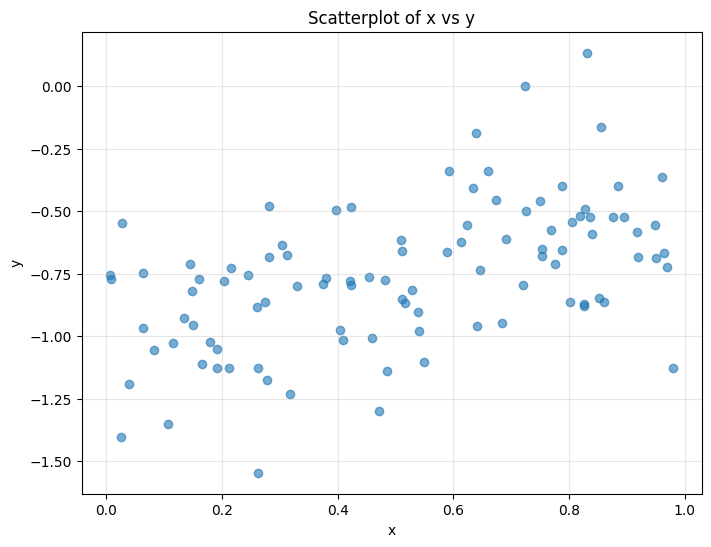

In [39]:
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y')
ax.grid(True, alpha=0.3)
plt.show()

# <small> Nearly around a straight line </small>

# (e) TODO Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [40]:
from sklearn import linear_model

reg=linear_model.LinearRegression()

reg.fit(x.reshape(-1,1),Y)

reg.coef_



array([0.50471239])

In [41]:
reg.intercept_

np.float64(-1.0173511402227777)

In [42]:
X = MS('x').fit_transform(pd.DataFrame({'x': x})) 
model=sm.OLS(y,X)
results_1=model.fit()

# Seems very close to the real $\beta_0$ and $\beta_1$

# (f) TODO Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

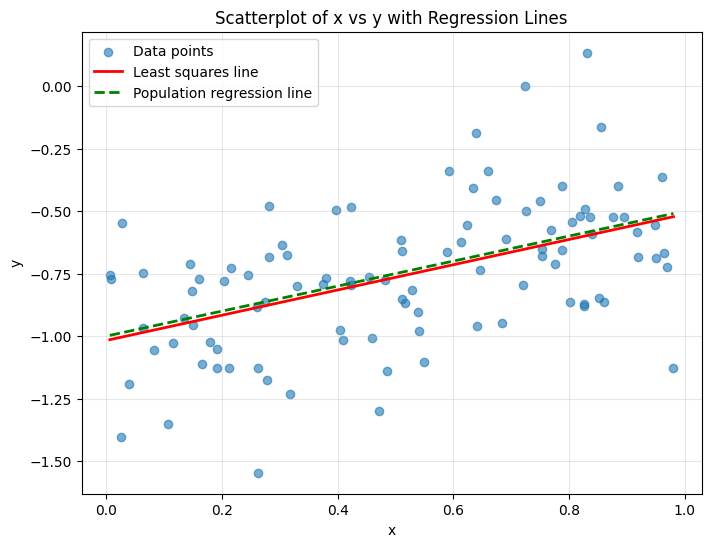

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# (g) TODO Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [44]:
x_square=x**2
x_square

array([2.61961376e-01, 9.03381238e-01, 2.07819939e-02, 8.99935774e-01,
       9.72388545e-02, 1.79205282e-01, 6.85091584e-01, 1.67443933e-01,
       3.02053222e-01, 7.59504723e-04, 5.67782005e-01, 2.89598226e-01,
       1.08723005e-01, 6.21619820e-01, 9.19271045e-02, 2.05660336e-01,
       1.79671766e-02, 1.62500080e-01, 4.13940350e-02, 6.88082886e-02,
       5.63047142e-01, 7.86290716e-02, 2.35410282e-01, 9.61845455e-01,
       9.24784558e-01, 5.25320458e-01, 2.92926509e-01, 7.66687389e-02,
       2.58090679e-02, 9.40755307e-01, 2.66326785e-01, 1.34248402e-02,
       3.88739475e-01, 6.03236660e-01, 3.75773047e-01, 8.41435079e-01,
       1.56759588e-03, 2.79406609e-01, 2.10989453e-01, 3.88747002e-03,
       4.11301821e-01, 7.26982757e-01, 3.51579051e-01, 6.76506823e-02,
       7.05400969e-01, 2.59586053e-01, 2.61007452e-01, 5.67054494e-01,
       2.18809287e-02, 6.71787959e-01, 4.66880996e-01, 6.19521595e-01,
       3.67167907e-02, 6.43788247e-01, 3.66048447e-02, 6.65082940e-03,
      

In [45]:
X_features=np.column_stack([x,x_square])

reg=linear_model.LinearRegression()
reg.fit(X_features,Y)

reg.coef_

array([ 0.6233776 , -0.11880775])

In [46]:
reg.intercept_

np.float64(-1.0371707830190444)

In [47]:
reg.score(X_features,Y)

0.2569016027755393

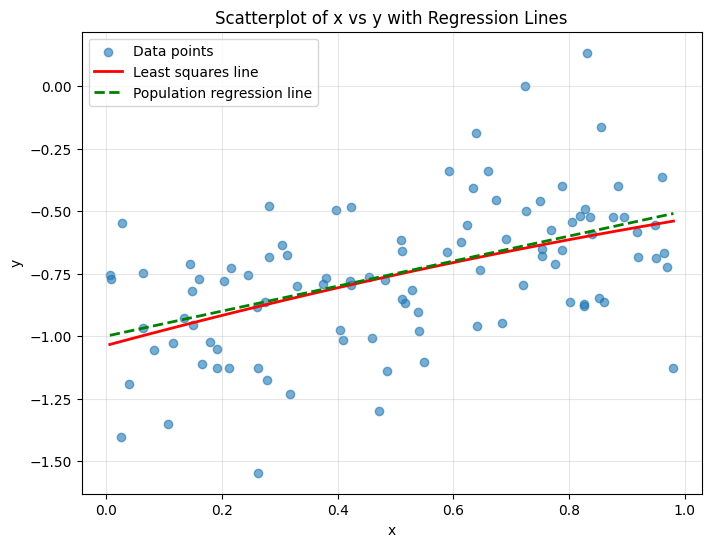

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line + reg.coef_[1] * (x_line**2)
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# (h) TODO Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

# Case:Smaller Noise

In [49]:
rng=np.random.default_rng(1)
n=100
x=rng.random(size=n)

x

array([0.51182162, 0.9504637 , 0.14415961, 0.94864945, 0.31183145,
       0.42332645, 0.82770259, 0.40919914, 0.54959369, 0.02755911,
       0.75351311, 0.53814331, 0.32973172, 0.7884287 , 0.30319483,
       0.45349789, 0.1340417 , 0.40311299, 0.20345524, 0.26231334,
       0.75036467, 0.28040876, 0.48519097, 0.9807372 , 0.96165719,
       0.72478994, 0.54122686, 0.2768912 , 0.16065201, 0.96992541,
       0.51606859, 0.11586561, 0.62348976, 0.77668311, 0.6130033 ,
       0.9172977 , 0.03959288, 0.52858926, 0.45933588, 0.06234958,
       0.64132817, 0.85263284, 0.59294102, 0.26009745, 0.83988152,
       0.50949588, 0.51088888, 0.75303021, 0.14792204, 0.81962672,
       0.68328691, 0.78709694, 0.19161626, 0.80236416, 0.19132393,
       0.08155262, 0.85522697, 0.8612835 , 0.8765371 , 0.47190972,
       0.27404839, 0.00709183, 0.6457209 , 0.71990938, 0.83556922,
       0.28187783, 0.21521817, 0.63933138, 0.80505483, 0.96367087,
       0.15052483, 0.48221239, 0.89471586, 0.42271691, 0.58950

# (b) TODO Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [50]:
eps=rng.normal(size=n,loc=0,scale=0.01)
eps

array([ 3.32813613e-03, -6.51281012e-03,  8.62444796e-03, -1.25592084e-03,
        6.69153241e-03,  1.21884361e-02,  3.82929583e-03, -8.75721143e-03,
       -1.51431863e-02,  1.75338412e-02, -1.11292193e-03, -6.88564948e-03,
        1.44257088e-03, -1.91411330e-03,  8.52142264e-03,  3.39281824e-04,
        1.37495836e-04, -7.14579721e-03,  4.69568099e-03, -1.03386672e-02,
        6.65889440e-03,  1.52393751e-02, -1.52468604e-02, -2.46622923e-02,
        6.16878755e-03,  2.54789782e-02, -1.00092485e-02, -1.25069576e-02,
        5.88968934e-03, -8.40721590e-03, -5.06025484e-03, -3.48117467e-03,
        5.32002086e-03, -4.05302361e-03,  2.77882840e-03, -1.76533259e-03,
       -8.44671104e-03, -3.19826258e-03, -9.50399665e-03,  6.51498587e-05,
       -1.12386623e-02, -1.09289437e-02,  1.45696182e-02, -5.31842203e-04,
       -5.39020255e-04,  5.11536420e-03, -4.20857003e-03, -2.28535367e-03,
        4.25148735e-03,  2.82415842e-03, -1.15929673e-02,  8.33342597e-03,
       -5.90434943e-03, -

# (c) TODO Using x and eps, generate a vector y according to the model
$$
Y = -1+0.5X+\epsilon
$$
# What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [51]:
Y=-1+0.5*x+eps
Y

array([-0.74076105, -0.53128096, -0.91929575, -0.5269312 , -0.83739274,
       -0.77614834, -0.58231941, -0.80415764, -0.74034634, -0.9686866 ,
       -0.62435637, -0.73781399, -0.83369157, -0.60769976, -0.83988116,
       -0.77291177, -0.93284166, -0.8055893 , -0.8935767 , -0.879182  ,
       -0.61815877, -0.84455625, -0.77265137, -0.53429369, -0.51300262,
       -0.61212605, -0.73939582, -0.87406136, -0.91378431, -0.52344451,
       -0.74702596, -0.94554837, -0.6829351 , -0.61571147, -0.69071952,
       -0.54311648, -0.98865027, -0.73890363, -0.77983606, -0.96876006,
       -0.69057458, -0.58461252, -0.68895987, -0.87048312, -0.58059826,
       -0.7401367 , -0.74876413, -0.62577025, -0.92178749, -0.58736248,
       -0.66994951, -0.5981181 , -0.91009622, -0.60937871, -0.91334279,
       -0.96312914, -0.55611351, -0.58111361, -0.56013069, -0.78542338,
       -0.86299148, -0.98745842, -0.67950619, -0.64633886, -0.57990028,
       -0.85205957, -0.88575434, -0.66060957, -0.59538091, -0.52

# <small> length:100 </small>
$  \beta_0:-1 $
$  \beta_1:0.5 $ 

# (d) TODO Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

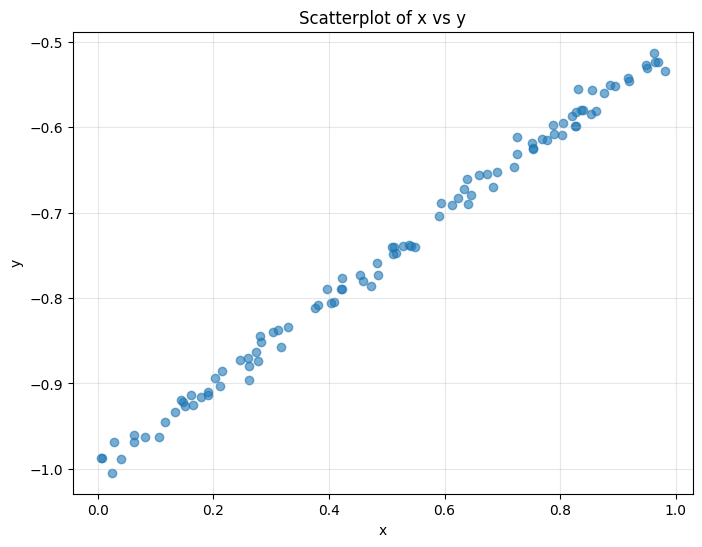

In [52]:
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y')
ax.grid(True, alpha=0.3)
plt.show()

# <small> Nearly around a straight line </small>

# (e) TODO Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [53]:
from sklearn import linear_model

reg=linear_model.LinearRegression()

reg.fit(x.reshape(-1,1),Y)

reg.coef_



array([0.5001885])

In [54]:
reg.intercept_

np.float64(-1.0006940456089113)

# Seems very close to the real $\beta_0$ and $\beta_1$

In [55]:
X = MS('x').fit_transform(pd.DataFrame({'x': x})) 
model=sm.OLS(y,X)
results_2=model.fit()

# (f) TODO Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

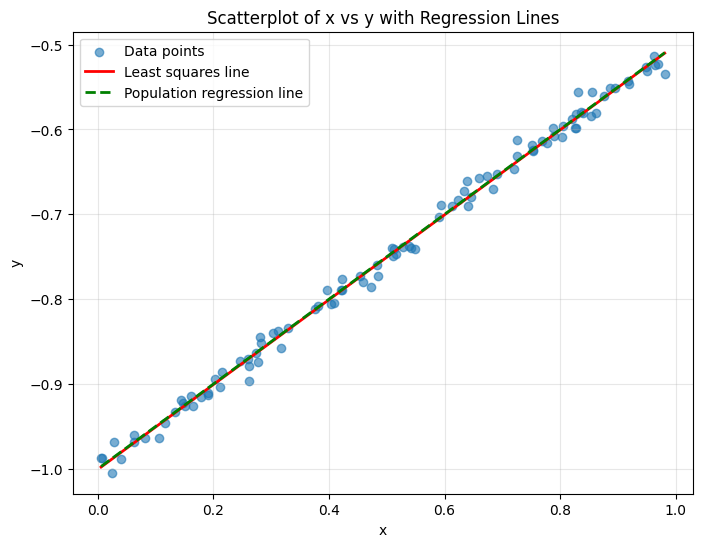

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# (g) TODO Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [57]:
x_square=x**2
x_square

array([2.61961376e-01, 9.03381238e-01, 2.07819939e-02, 8.99935774e-01,
       9.72388545e-02, 1.79205282e-01, 6.85091584e-01, 1.67443933e-01,
       3.02053222e-01, 7.59504723e-04, 5.67782005e-01, 2.89598226e-01,
       1.08723005e-01, 6.21619820e-01, 9.19271045e-02, 2.05660336e-01,
       1.79671766e-02, 1.62500080e-01, 4.13940350e-02, 6.88082886e-02,
       5.63047142e-01, 7.86290716e-02, 2.35410282e-01, 9.61845455e-01,
       9.24784558e-01, 5.25320458e-01, 2.92926509e-01, 7.66687389e-02,
       2.58090679e-02, 9.40755307e-01, 2.66326785e-01, 1.34248402e-02,
       3.88739475e-01, 6.03236660e-01, 3.75773047e-01, 8.41435079e-01,
       1.56759588e-03, 2.79406609e-01, 2.10989453e-01, 3.88747002e-03,
       4.11301821e-01, 7.26982757e-01, 3.51579051e-01, 6.76506823e-02,
       7.05400969e-01, 2.59586053e-01, 2.61007452e-01, 5.67054494e-01,
       2.18809287e-02, 6.71787959e-01, 4.66880996e-01, 6.19521595e-01,
       3.67167907e-02, 6.43788247e-01, 3.66048447e-02, 6.65082940e-03,
      

In [58]:
X_features=np.column_stack([x,x_square])

reg=linear_model.LinearRegression()
reg.fit(X_features,Y)

reg.coef_

array([ 0.5049351 , -0.00475231])

In [59]:
reg.intercept_

np.float64(-1.0014868313207619)

In [60]:
reg.score(X_features,Y)

0.9952941512563193

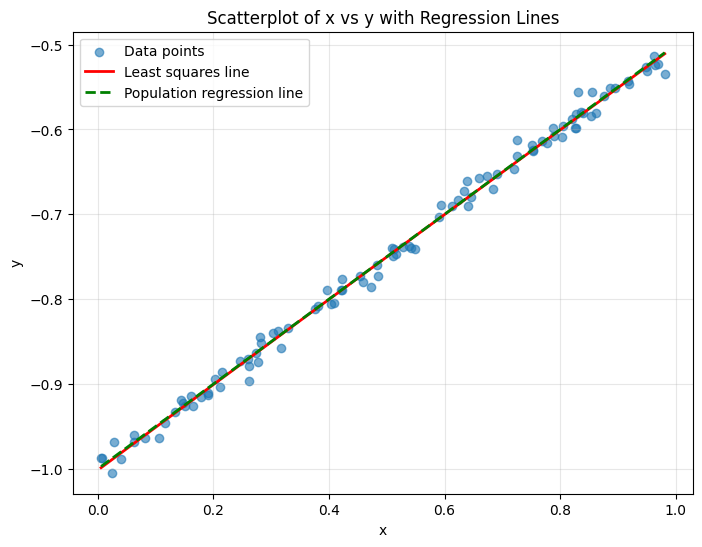

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line + reg.coef_[1] * (x_line**2)
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# Case:Bigger Noise

In [62]:
rng=np.random.default_rng(1)
n=100
x=rng.random(size=n)

x

array([0.51182162, 0.9504637 , 0.14415961, 0.94864945, 0.31183145,
       0.42332645, 0.82770259, 0.40919914, 0.54959369, 0.02755911,
       0.75351311, 0.53814331, 0.32973172, 0.7884287 , 0.30319483,
       0.45349789, 0.1340417 , 0.40311299, 0.20345524, 0.26231334,
       0.75036467, 0.28040876, 0.48519097, 0.9807372 , 0.96165719,
       0.72478994, 0.54122686, 0.2768912 , 0.16065201, 0.96992541,
       0.51606859, 0.11586561, 0.62348976, 0.77668311, 0.6130033 ,
       0.9172977 , 0.03959288, 0.52858926, 0.45933588, 0.06234958,
       0.64132817, 0.85263284, 0.59294102, 0.26009745, 0.83988152,
       0.50949588, 0.51088888, 0.75303021, 0.14792204, 0.81962672,
       0.68328691, 0.78709694, 0.19161626, 0.80236416, 0.19132393,
       0.08155262, 0.85522697, 0.8612835 , 0.8765371 , 0.47190972,
       0.27404839, 0.00709183, 0.6457209 , 0.71990938, 0.83556922,
       0.28187783, 0.21521817, 0.63933138, 0.80505483, 0.96367087,
       0.15052483, 0.48221239, 0.89471586, 0.42271691, 0.58950

# (b) TODO Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [63]:
eps=rng.normal(size=n,loc=0,scale=1)
eps

array([ 3.32813613e-01, -6.51281012e-01,  8.62444796e-01, -1.25592084e-01,
        6.69153241e-01,  1.21884361e+00,  3.82929583e-01, -8.75721143e-01,
       -1.51431863e+00,  1.75338412e+00, -1.11292193e-01, -6.88564948e-01,
        1.44257088e-01, -1.91411330e-01,  8.52142264e-01,  3.39281824e-02,
        1.37495836e-02, -7.14579721e-01,  4.69568099e-01, -1.03386672e+00,
        6.65889440e-01,  1.52393751e+00, -1.52468604e+00, -2.46622923e+00,
        6.16878755e-01,  2.54789782e+00, -1.00092485e+00, -1.25069576e+00,
        5.88968934e-01, -8.40721590e-01, -5.06025484e-01, -3.48117467e-01,
        5.32002086e-01, -4.05302361e-01,  2.77882840e-01, -1.76533259e-01,
       -8.44671104e-01, -3.19826258e-01, -9.50399665e-01,  6.51498587e-03,
       -1.12386623e+00, -1.09289437e+00,  1.45696182e+00, -5.31842203e-02,
       -5.39020255e-02,  5.11536420e-01, -4.20857003e-01, -2.28535367e-01,
        4.25148735e-01,  2.82415842e-01, -1.15929673e+00,  8.33342597e-01,
       -5.90434943e-01, -

# (c) TODO Using x and eps, generate a vector y according to the model
$$
Y = -1+0.5X+\epsilon
$$
# What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [64]:
Y=-1+0.5*x+eps
Y

array([-0.41127557, -1.17604916, -0.0654754 , -0.65126736, -0.17493103,
        0.43050683, -0.20321912, -1.67112158, -2.23952179,  0.76716367,
       -0.73453564, -1.41949329, -0.69087705, -0.79719698,  0.00373968,
       -0.73932287, -0.91922957, -1.51302323, -0.42870428, -1.90271005,
        0.04107178,  0.66414189, -2.28209055, -2.97586063,  0.09770735,
        1.91029279, -1.73031142, -2.11225016, -0.33070506, -1.35575888,
       -1.24799119, -1.29018466, -0.15625304, -1.0169608 , -0.41561551,
       -0.71788441, -1.82487467, -1.05553163, -1.72073172, -0.96231022,
       -1.80320214, -1.66657795,  0.75343232, -0.9231355 , -0.63396126,
       -0.23371564, -1.16541256, -0.85202026, -0.50089025, -0.3077708 ,
       -1.81765327,  0.22689107, -1.49462681, -1.65489687, -1.80481311,
       -1.34976904,  1.05491374, -1.74489416, -0.40165556, -2.9018695 ,
       -0.86454274, -0.09688767, -0.91380287, -1.26940023, -0.35070433,
       -0.15890934, -0.22873335,  1.29213954, -0.38830511, -1.11

# <small> length:100 </small>
$  \beta_0:-1 $
$  \beta_1:0.5 $ 

# (d) TODO Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

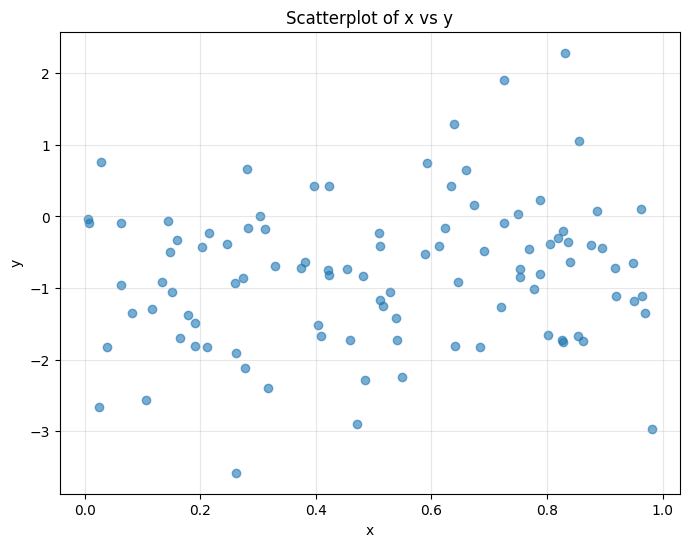

In [65]:
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y')
ax.grid(True, alpha=0.3)
plt.show()

# <small> Nearly around a straight line </small>

# (e) TODO Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [66]:
X = MS('x').fit_transform(pd.DataFrame({'x': x})) 
model=sm.OLS(y,X)
results_3=model.fit()

In [67]:
from sklearn import linear_model

reg=linear_model.LinearRegression()

reg.fit(x.reshape(-1,1),Y)

reg.coef_



array([0.51884958])

In [68]:
reg.intercept_

np.float64(-1.0694045608911114)

# Seems very close to the real $\beta_0$ and $\beta_1$

# (f) TODO Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

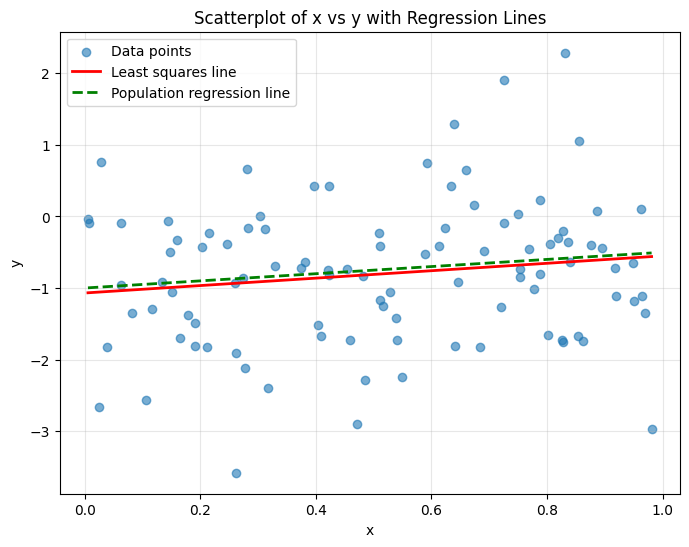

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# (g) TODO Now fit a polynomial regression model that predicts y using x and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [70]:
x_square=x**2
x_square

array([2.61961376e-01, 9.03381238e-01, 2.07819939e-02, 8.99935774e-01,
       9.72388545e-02, 1.79205282e-01, 6.85091584e-01, 1.67443933e-01,
       3.02053222e-01, 7.59504723e-04, 5.67782005e-01, 2.89598226e-01,
       1.08723005e-01, 6.21619820e-01, 9.19271045e-02, 2.05660336e-01,
       1.79671766e-02, 1.62500080e-01, 4.13940350e-02, 6.88082886e-02,
       5.63047142e-01, 7.86290716e-02, 2.35410282e-01, 9.61845455e-01,
       9.24784558e-01, 5.25320458e-01, 2.92926509e-01, 7.66687389e-02,
       2.58090679e-02, 9.40755307e-01, 2.66326785e-01, 1.34248402e-02,
       3.88739475e-01, 6.03236660e-01, 3.75773047e-01, 8.41435079e-01,
       1.56759588e-03, 2.79406609e-01, 2.10989453e-01, 3.88747002e-03,
       4.11301821e-01, 7.26982757e-01, 3.51579051e-01, 6.76506823e-02,
       7.05400969e-01, 2.59586053e-01, 2.61007452e-01, 5.67054494e-01,
       2.18809287e-02, 6.71787959e-01, 4.66880996e-01, 6.19521595e-01,
       3.67167907e-02, 6.43788247e-01, 3.66048447e-02, 6.65082940e-03,
      

In [71]:
X_features=np.column_stack([x,x_square])

reg=linear_model.LinearRegression()
reg.fit(X_features,Y)

reg.coef_

array([ 0.99351041, -0.47523098])

In [72]:
reg.intercept_

np.float64(-1.1486831320761781)

In [73]:
reg.score(X_features,Y)

0.023365892061283366

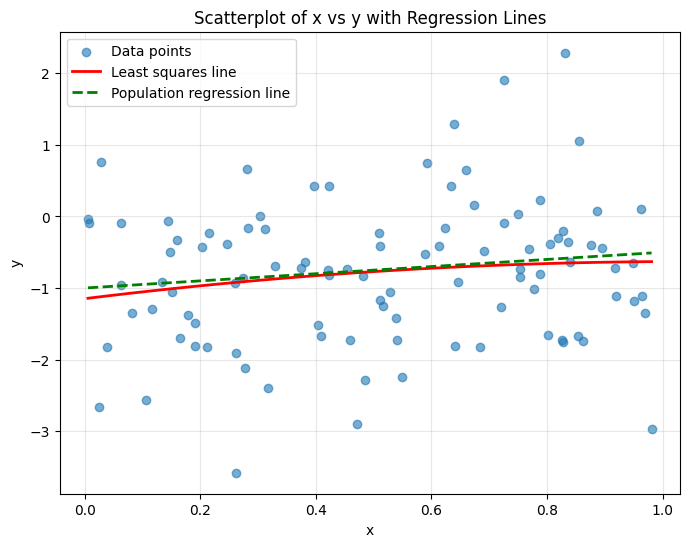

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatterplot (from part d)
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x, Y, alpha=0.6, label='Data points')

# Generate x values for plotting the lines
x_line = np.linspace(x.min(), x.max(), 100)

# Plot the least squares line (fitted regression line)
y_least_squares = reg.intercept_ + reg.coef_[0] * x_line + reg.coef_[1] * (x_line**2)
ax.plot(x_line, y_least_squares, 'r-', linewidth=2, label='Least squares line')

# Plot the population regression line (Y = -1 + 0.5*X)
y_population = -1 + 0.5 * x_line
ax.plot(x_line, y_population, 'g--', linewidth=2, label='Population regression line')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatterplot of x vs y with Regression Lines')
ax.grid(True, alpha=0.3)

# Add legend
ax.legend()

plt.show()

# (j) TODO What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results

In [75]:
results_1.conf_int(alpha=0.05)

,0,1
intercept,-0.208491,0.483993
x,-1.000900,0.176984


In [76]:
results_2.conf_int(alpha=0.05)

,0,1
intercept,-0.208491,0.483993
x,-1.000900,0.176984


In [77]:
results_3.conf_int(alpha=0.05)

,0,1
intercept,-0.208491,0.483993
x,-1.000900,0.176984


# 14

# (a) TODO The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [78]:
rng=np.random.default_rng(10)
x1=rng.uniform(0,1,size=100)
x2=0.5*x1+rng.normal(size=100)/10
y=2+2*x1+0.3*x2+rng.normal(size=100)

$$
y=2+2*x_1+0.3*x_2+\epsilon
$$

# (b) TODO What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [79]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

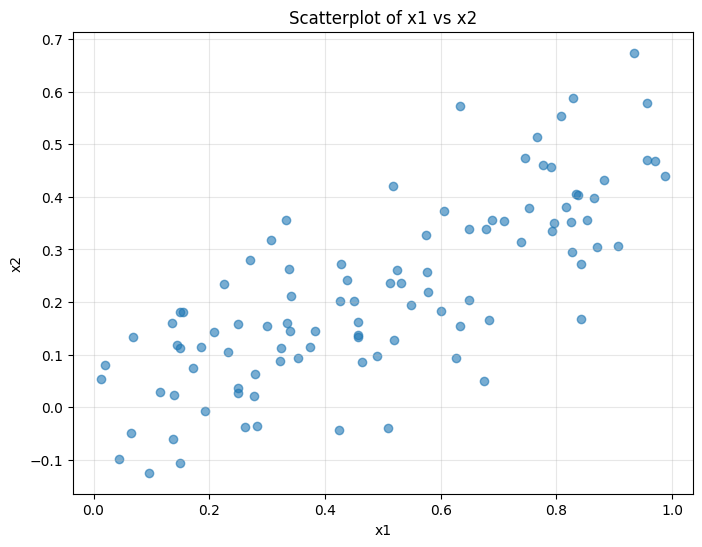

In [80]:
import matplotlib.pyplot as plt

# 创建散点图显示 x1 和 x2 之间的关系
fig, ax = subplots(figsize=(8, 6))
ax.scatter(x1, x2, alpha=0.6)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Scatterplot of x1 vs x2')
ax.grid(True, alpha=0.3)
plt.show()

# (c) TODO Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [81]:
model=linear_model.LinearRegression()
X_feature=np.column_stack([x1,x2])

model.fit(X_feature,y)

model.coef_

array([1.6153677, 0.9427767])

In [82]:
model.intercept_

np.float64(1.957909291136691)

In [83]:
X=MS(['x1','x2']).fit_transform(pd.DataFrame({'x1':x1,'x2':x2}))

model=sm.OLS(y,X)
results=model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


# <small> Cannot Reject the null hypothesis. </small>

# (d) TODO Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [84]:
X=MS(['x1']).fit_transform(pd.DataFrame({'x1':x1}))

model=sm.OLS(y,X)
results=model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


# <small> Can Reject the Null Hypothesis.</small>

# (e) TODO Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?

In [85]:
X=MS(['x2']).fit_transform(pd.DataFrame({'x2':x2}))

model=sm.OLS(y,X)
results=model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


# <small>Can Reject the Null Hypothesis.</small>

# (f) TODO Do the results obtained in (c)–(e) contradict each other? Explain your answer.

# <small>It does not contradict. This is expected behavior with multicollinearity, not a contradiction. Separate regressions don't account for shared information, while multiple regression does.</small>

# 15

# (a) TODO For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [87]:
Boston=load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [97]:
all_vars=Boston.columns
all_vars=all_vars.to_list()
all_vars.pop(0)
all_vars


['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

In [98]:
y=Boston['crim']

for col in all_vars:
    X=MS([col]).fit_transform(Boston)
    model=sm.OLS(y,X)
    print(summarize(model.fit()))

             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0
             coef  std err       t  P>|t|
intercept -2.2872    0.443  -5.157    0.0
rad        0.6179    0.034  17.998    0.

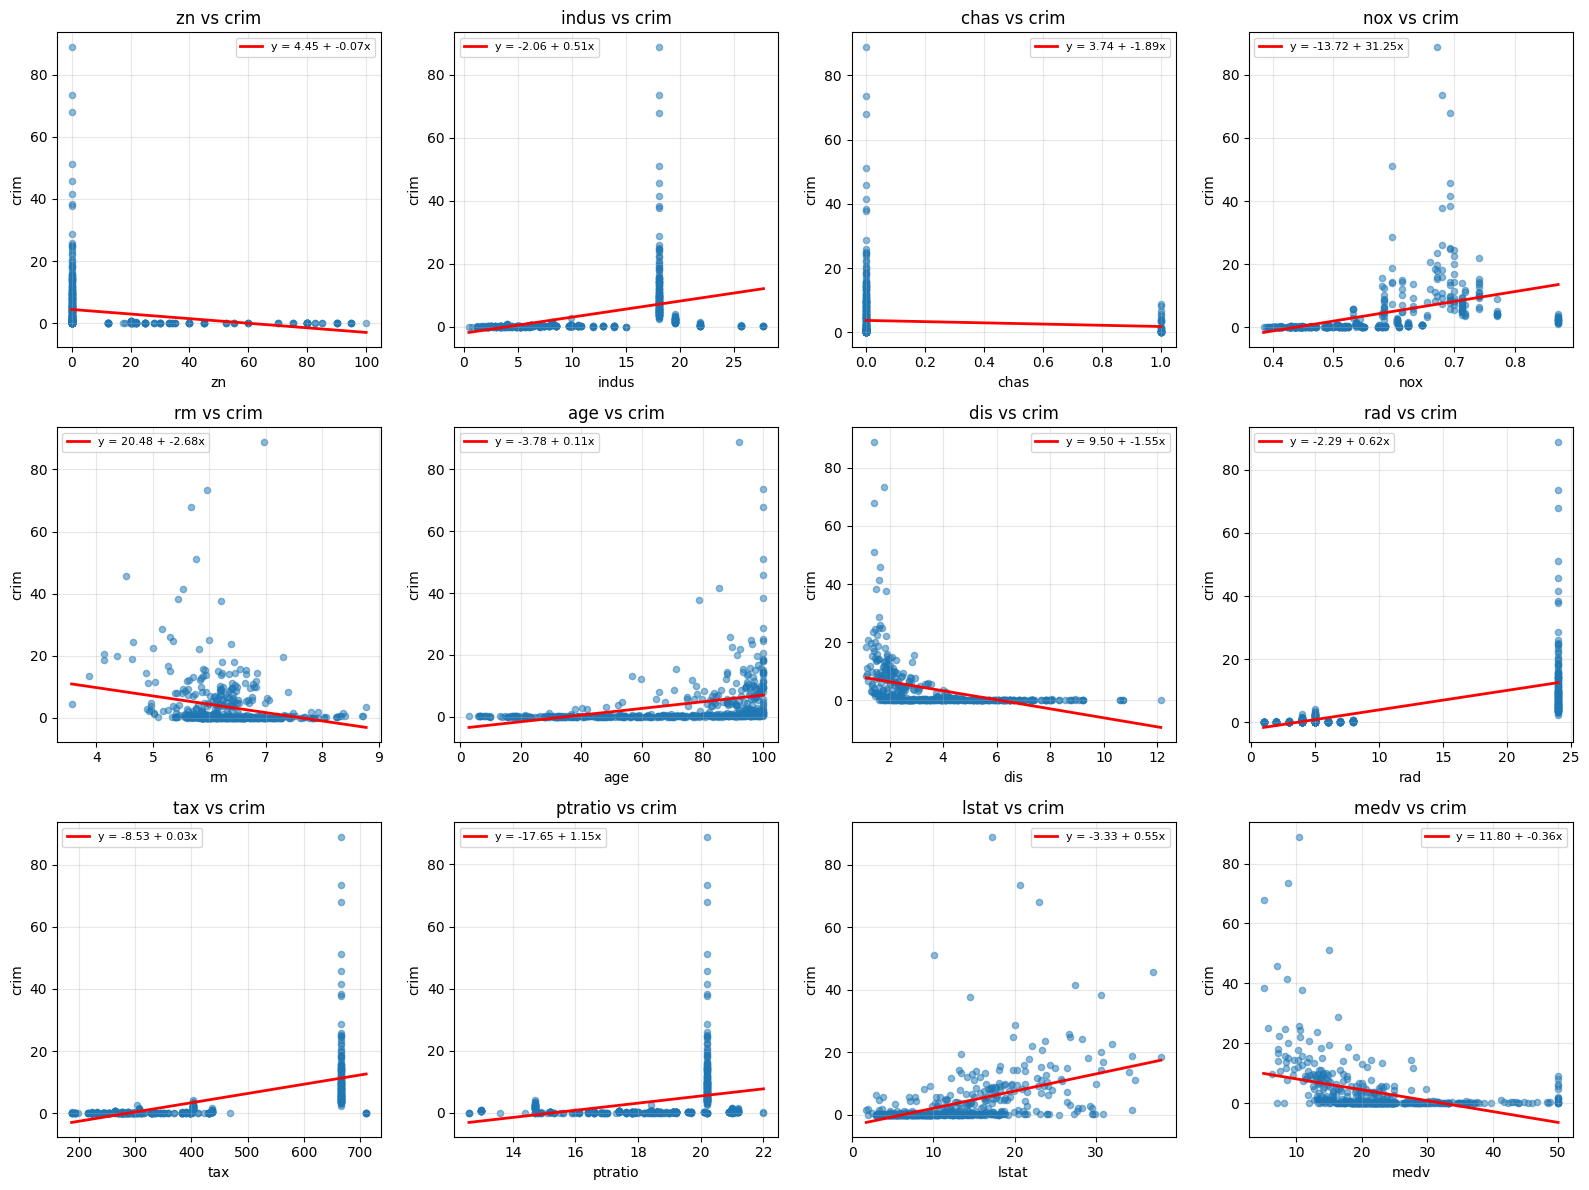

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# 计算子图布局（13个特征）
n_features = len(all_vars)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # 向上取整

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, col in enumerate(all_vars):
    ax = axes[idx]
    
    # 散点图
    ax.scatter(Boston[col], y, alpha=0.5, s=20)
    
    # 拟合回归模型
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    
    # 获取回归系数
    intercept = results.params['intercept']
    slope = results.params[col]
    
    # 生成回归线
    x_line = np.linspace(Boston[col].min(), Boston[col].max(), 100)
    y_line = intercept + slope * x_line
    
    # 绘制回归线
    ax.plot(x_line, y_line, 'r-', linewidth=2, label=f'y = {intercept:.2f} + {slope:.2f}x')
    
    # 设置标签和标题
    ax.set_xlabel(col)
    ax.set_ylabel('crim')
    ax.set_title(f'{col} vs crim')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

# 隐藏多余的子图
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# (b) TODO Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [101]:
X=MS(all_vars).fit_transform(Boston)

model=sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


# <small> For 'dis' 'red' 'mdev' we can reject the null hypothesis. </small>

# (c) TODO How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

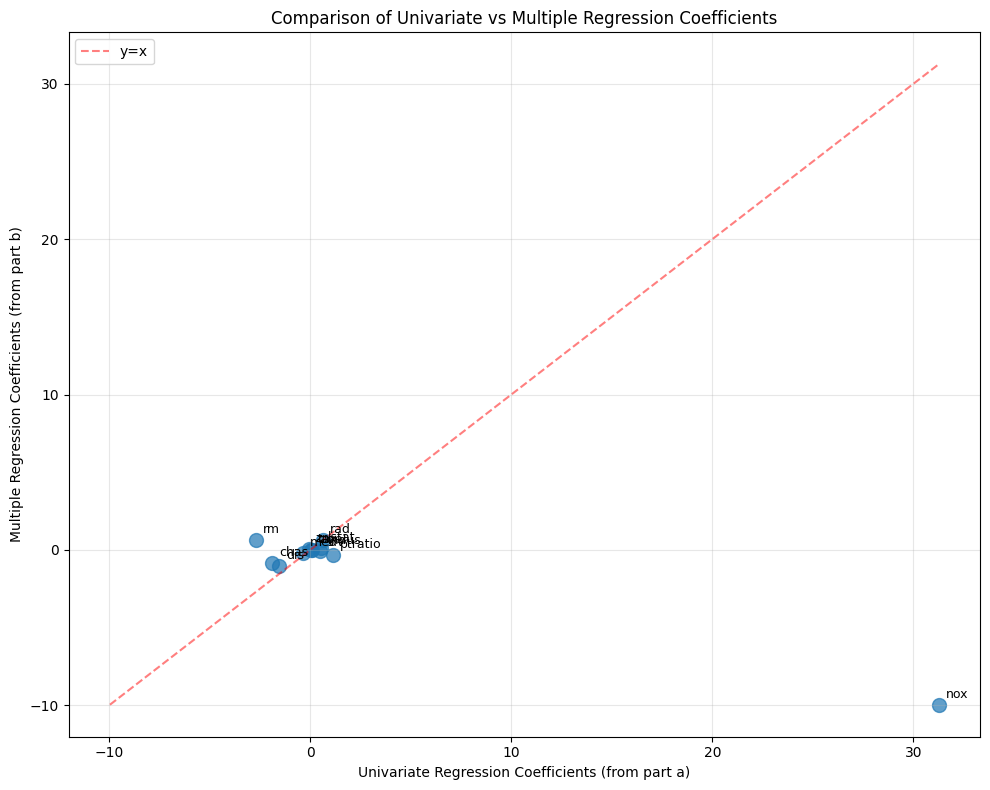

In [102]:
# Extract coefficients from part (a) - simple linear regressions
univariate_coefs = {}
for col in all_vars:
    X = MS([col]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    univariate_coefs[col] = results.params[col]

# Extract coefficients from part (b) - multiple regression
X_multiple = MS(all_vars).fit_transform(Boston)
model_multiple = sm.OLS(y, X_multiple)
results_multiple = model_multiple.fit()

multiple_coefs = {}
for col in all_vars:
    multiple_coefs[col] = results_multiple.params[col]

# Create the comparison plot
fig, ax = plt.subplots(figsize=(10, 8))

# Extract x and y values
x_vals = [univariate_coefs[col] for col in all_vars]
y_vals = [multiple_coefs[col] for col in all_vars]

# Create scatter plot
ax.scatter(x_vals, y_vals, s=100, alpha=0.7)

# Add labels for each point
for col, x, y in zip(all_vars, x_vals, y_vals):
    ax.annotate(col, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

# Add diagonal line (y=x) for reference
min_val = min(min(x_vals), min(y_vals))
max_val = max(max(x_vals), max(y_vals))
ax.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='y=x')

# Set labels and title
ax.set_xlabel('Univariate Regression Coefficients (from part a)')
ax.set_ylabel('Multiple Regression Coefficients (from part b)')
ax.set_title('Comparison of Univariate vs Multiple Regression Coefficients')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# (d) TODO Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
$$
Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon
$$

In [104]:
y=Boston['crim']

for col in all_vars:
    X=MS([poly(col,degree=3)]).fit_transform(Boston)
    model=sm.OLS(y,X)
    print(summarize(model.fit()))

                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000
                           coef  std err      t  P>|t|
intercept                3.6916    0.388  9.506  0.000
poly(chas, degree=3)[0] -0.1172    0.066 -1.784  0.075
poly(chas, degree=3)[1] -0.5808    0.236 -2.463  0.014
poly(chas, degree=3)[2] -0.7918    0.706 -1.122  0.263
                           coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, degree=3)[0]  81.3720    7.234  11.249    0

# <small> At least nox indus medv have the non-linear association.</small>